In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Our target variable is Loan status, Whether the applicant loan approved or not.
This is classification problem.

### EDA

In [4]:
### Checking data size.
data.shape

(614, 13)

Our dataset contain 614 rows and 13 columns.

In [5]:
### Checking basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


By looking basic information we can see there are 4 columns which contain float dtype data, 1 column contain Int dtype data and 8 columns contain string dtype data.
Also we can see there is null values in multiple columns.

In [6]:
### Checking null values in our dataset.
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In Gender column we have 13 null values.
In Married we have 3 null values.
Dependents we have 15 null values.
In Self employed column we have 32 null values.
In LoanAmount column we have 22 null values     
Loan_amount term column contain 14 null values.
And Credit history contain 50 null values.
We will process null values and try to fill them up with appropiate numbers.

In [7]:
### Filling null values.
data['Gender'].fillna(method='bfill',inplace=True) ### Filling NAN value using back fill method
data['Married'] = data['Married'].fillna(data['Married'].mode()[0]) ### filling NaN Values using column Mode
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0]) ## filling NaN Values using column Mode
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0]) ## filling NaN Values using column Mode
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean()) ## filling NaN Values using column Mean value
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean()) ## filling NaN Values using column Mean value
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0]) ## filling NaN Values using column mode value

In [8]:
### Checking for null values again
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

So as we can see there is no null values in our dataset now.

In [9]:
### Checking unique data in Gender.
data['Gender'].value_counts()

Male      501
Female    113
Name: Gender, dtype: int64

In [10]:
### Checking unique data in Married column
data['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [11]:
### Checking unique data in Dependent column
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
### Checking classes in Self employed column
data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [13]:
### Checking unique number in Credit_History.
data['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [14]:
### Checking value counts in Loan_Amount_Term
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [15]:
### Checking unique values in LoanAmount          
data['LoanAmount'].value_counts()

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
211.000000     1
250.000000     1
62.000000      1
85.000000      1
436.000000     1
Name: LoanAmount, Length: 204, dtype: int64

In [16]:
### Checking descriptive data description for continous data column.
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


This counts for loanAmount and Loan Amount term shows data loss.
The difference between mean and std looks fine for all the columns accept Coapplicantincome column.
The differnce between Min, max and quartiles looks normal for all the columns. IN Coapplicantincome column there are zero values for min and Q1 we have to look in to this column.

### Let's visualize our dataset and get more information.
#### (i) Univeriate Analysis

Y    422
N    192
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

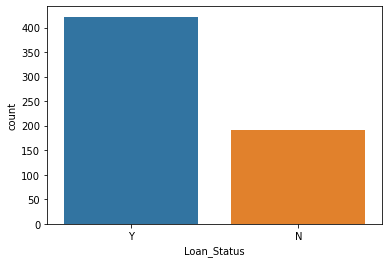

In [17]:
### ploting count plot for target variable.
print(data['Loan_Status'].value_counts())
sns.countplot(x='Loan_Status',data=data)

We can see there is class imbalance problem in our target variable, for Yes we have 422 entries, and for No we have only 192 entries. Will balance the class later.

<AxesSubplot:xlabel='Married', ylabel='count'>

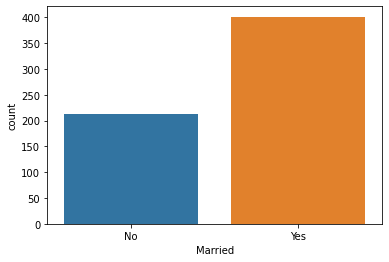

In [18]:
### Ploting Married column.
sns.countplot(x='Married',data=data)

 Loan application for married people are more as compare to unmarried people.

<AxesSubplot:xlabel='Dependents'>

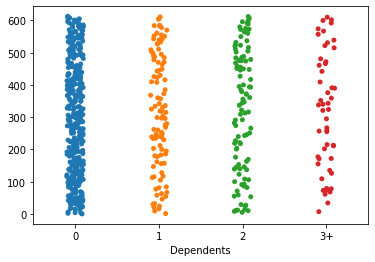

In [19]:
sns.stripplot(x='Dependents',y= data.index,data=data)

 People with 0 dependent are more as compare to others with 1 2 and 3+

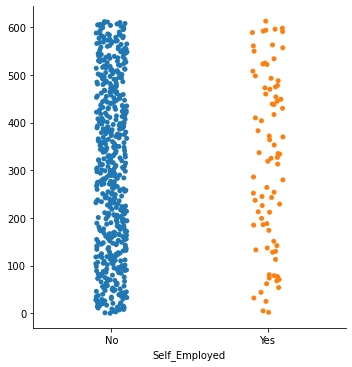

In [20]:
sns.catplot(x='Self_Employed',y= data.index,data=data)

In our dataset max applicants are not self employeed.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


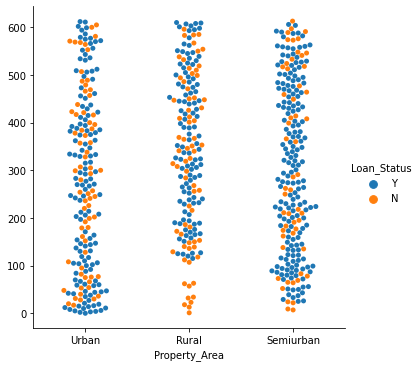

In [21]:
sns.catplot(x='Property_Area', y= data.index,data=data, hue='Loan_Status',kind='swarm')
print(data['Property_Area'].value_counts())

From above plot we can see that the applicant who's property is in Semiurban area will increase the loan approval chances.

#### (ii) Bivariate Analysis

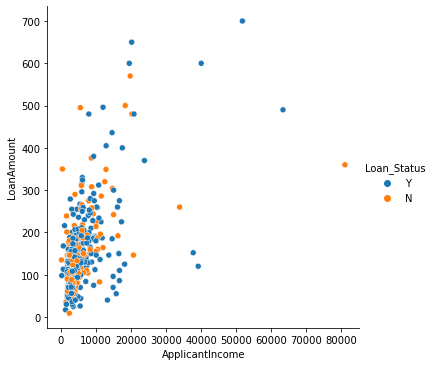

In [22]:
###Ploting graph between ApplicantIncome and LoanAmount.
sns.relplot(x='ApplicantIncome', y='LoanAmount',data=data,hue='Loan_Status')

From above graph we can see if there is slight hike in applicant salary the chances for Loan approval will increase.
Also we can see few outlier in this plot.
This graph also shows that less Loan amount will approved esaily.

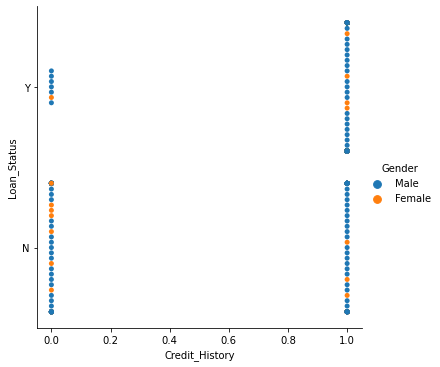

In [23]:
### Ploting plot between Credit history and Loan status.
sns.catplot(x='Credit_History',y= 'Loan_Status',hue='Gender',data=data, kind='swarm')

 IF the Credit_History is 1 then the chances of Loan Approval is high, And if the Credit_history is low there are more chances to discard the loan request.

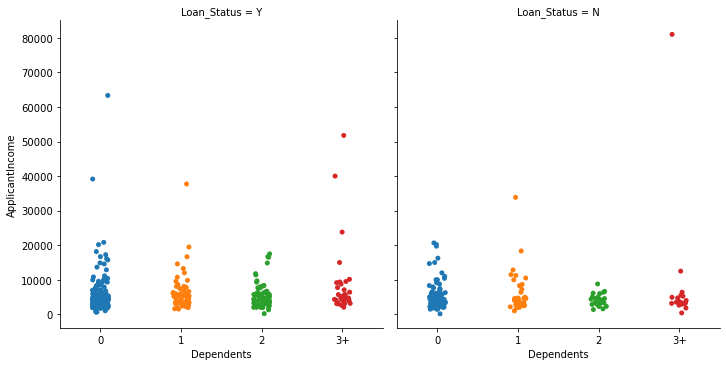

In [24]:
### ploting graph between Dependents and ApplicantIncome
sns.catplot(x='Dependents',y='ApplicantIncome',data=data,col='Loan_Status')

Dependants are more likely to get loan approval.

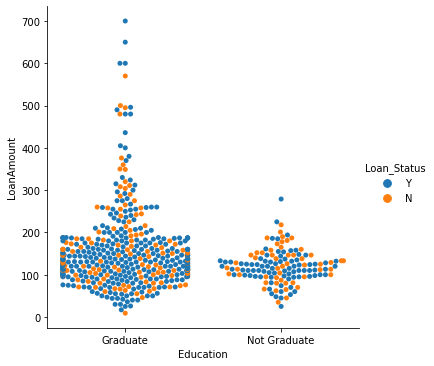

In [25]:
sns.catplot(x='Education',y='LoanAmount' ,data=data,kind='swarm',hue='Loan_Status')

 Graduate applicant will get esaily approval for loan amount. Also the the loan amount is higher as compare to Not Graduate

#### (iii) multivariate analysis

In [26]:
### In order to perform multivariate analysis we have to convert our catagorical columns into integer data.
cols = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']

In [27]:
### Before that we need to convert our catagorical data into numaric.
from sklearn.preprocessing import LabelEncoder
l_encoder = LabelEncoder()
data[cols] = data[cols].apply(l_encoder.fit_transform) ### Applying label encoder on all the catagorical columns

In [28]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,LP001014,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [29]:
### we can drop this Loan ID as this is not giving any information.
data.drop(['Loan_ID'],axis=1,inplace=True)

<AxesSubplot:>

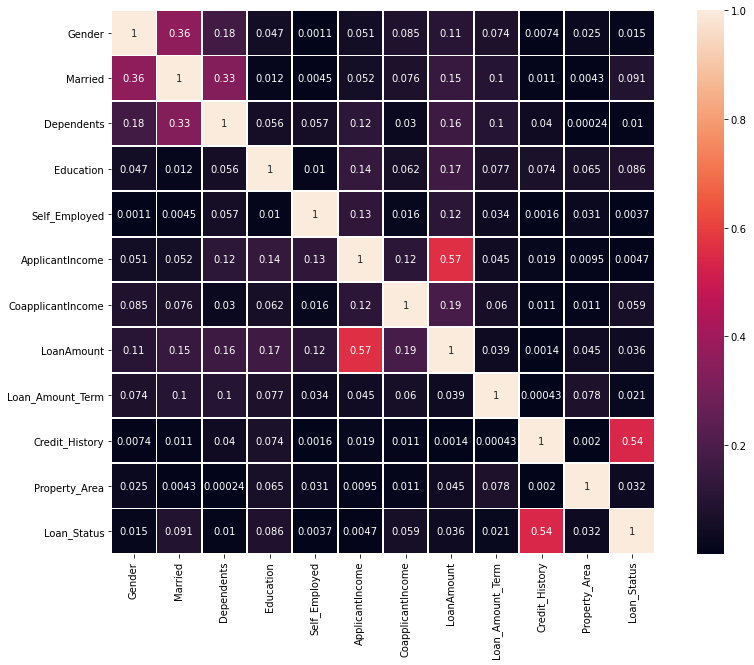

In [30]:
#### Let's check correlationship between target variable and features variable.
data_corr = data.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(data=data_corr,linewidths=1,annot=True, square=True,)

From above heatmap we can see the that Credit_histroy is showing 54% correlationship with our target variable.
Also we can see ApplicantIncome is showing 57% correlationship with Loan Amount.

<AxesSubplot:title={'center':'Correlation with Loan_Status'}>

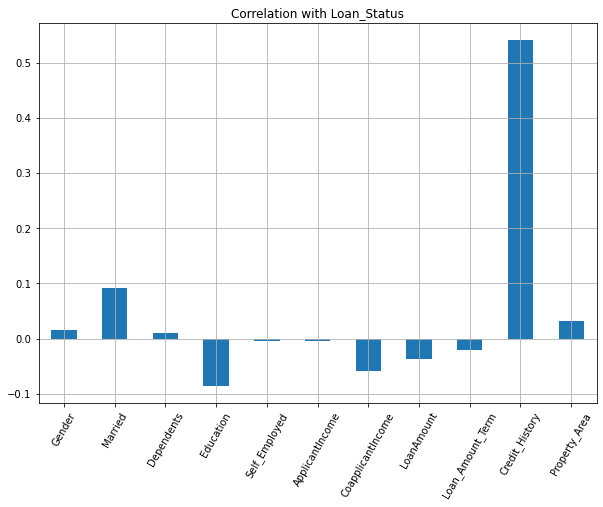

In [31]:
### let's calculate the featues Correlation values with our target variable.
data.drop('Loan_Status',axis=1).corrwith(data.Loan_Status).plot(kind = 'bar', grid = True, figsize=(10,7),rot = 60,title = 'Correlation with Loan_Status')

 Only Credit score is showing strong correlationship with our target variable.

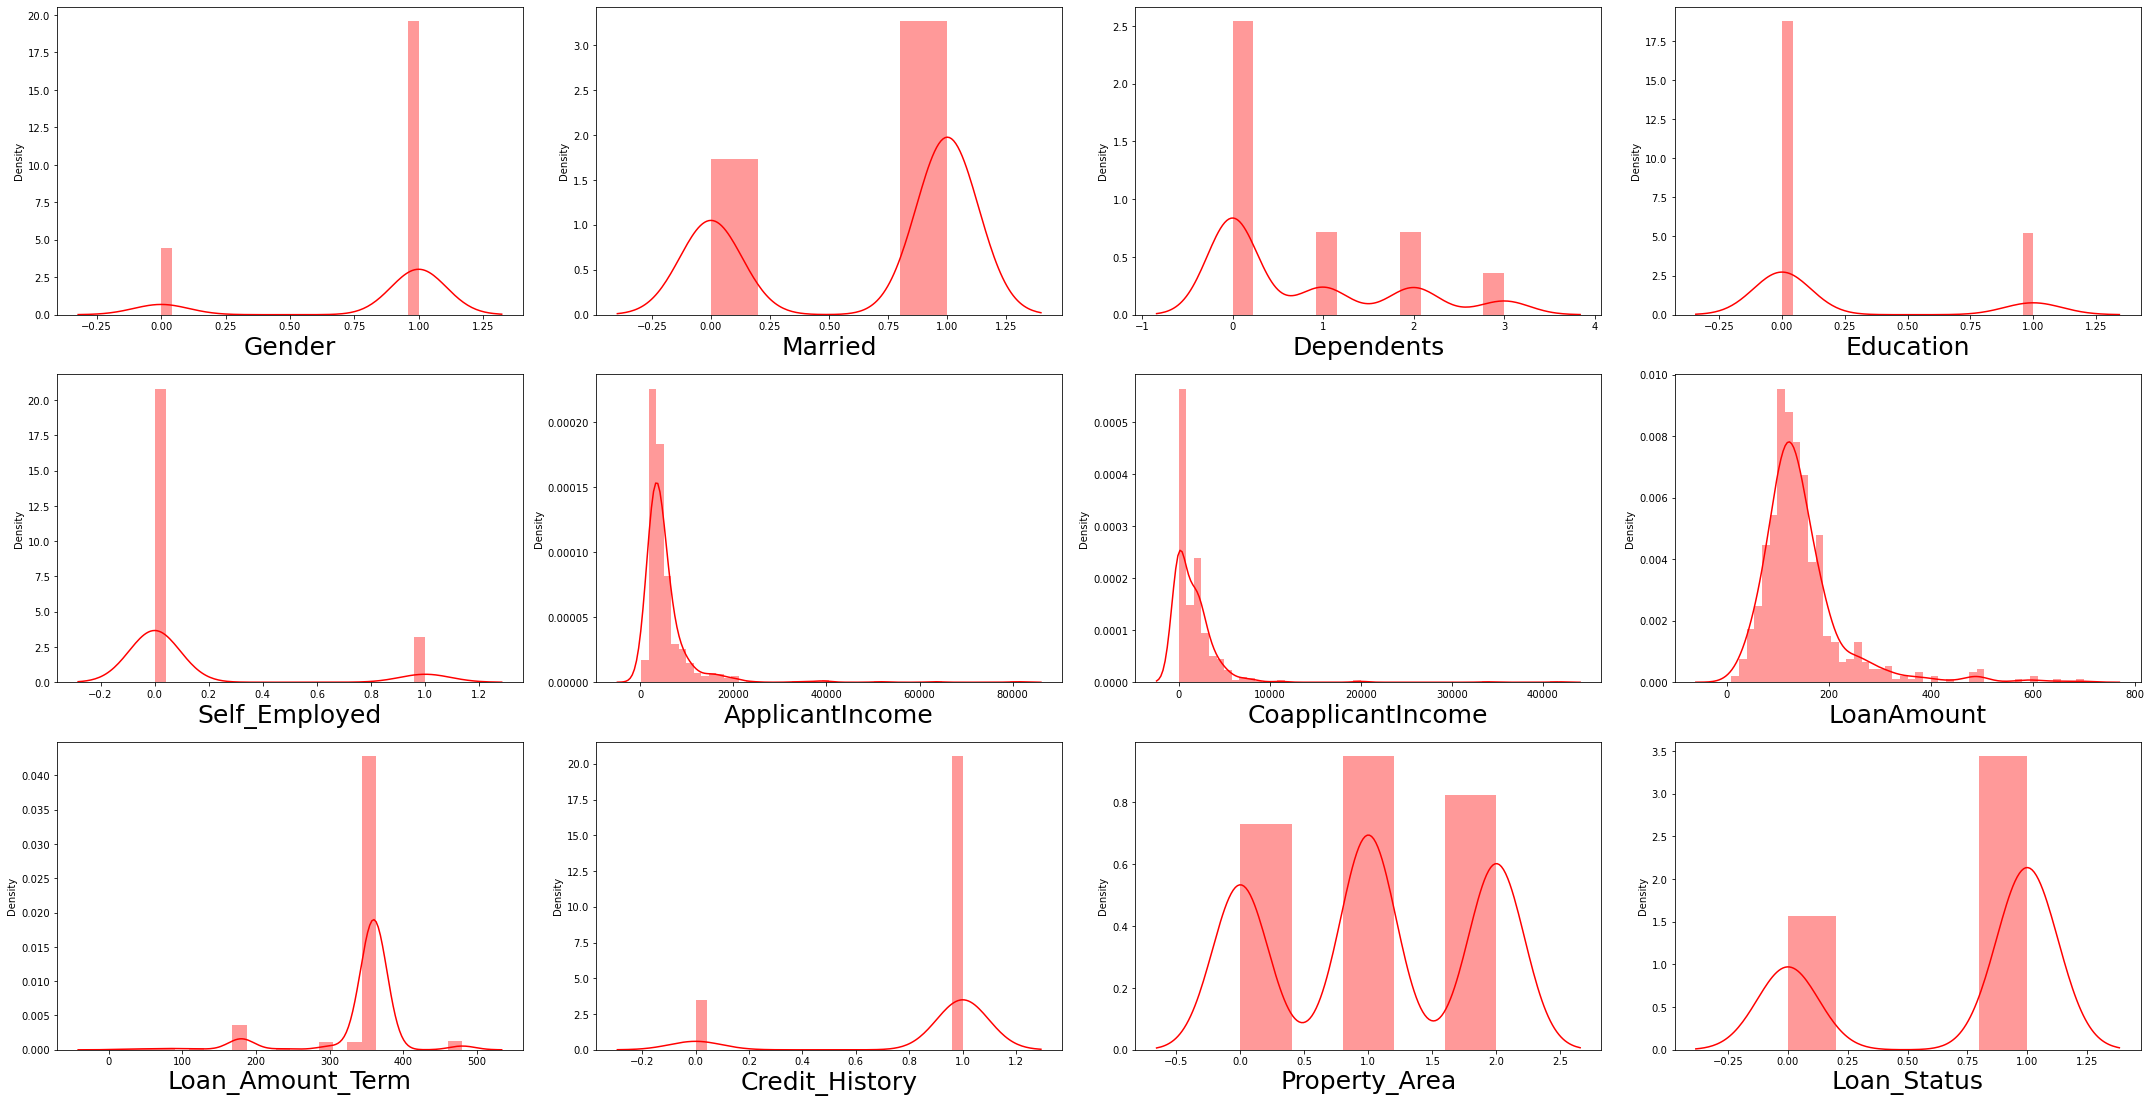

In [32]:
### Let's check data destribution first.
plt.figure(figsize=(30,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <= 17:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(data[column],color='r')
        plt.xlabel(column,fontsize=25)
        
    plotnumber+=1
plt.tight_layout()

The data distribution in our catagorical columns are highly skewed.

In [33]:
data.skew()

Gender              -1.634695
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

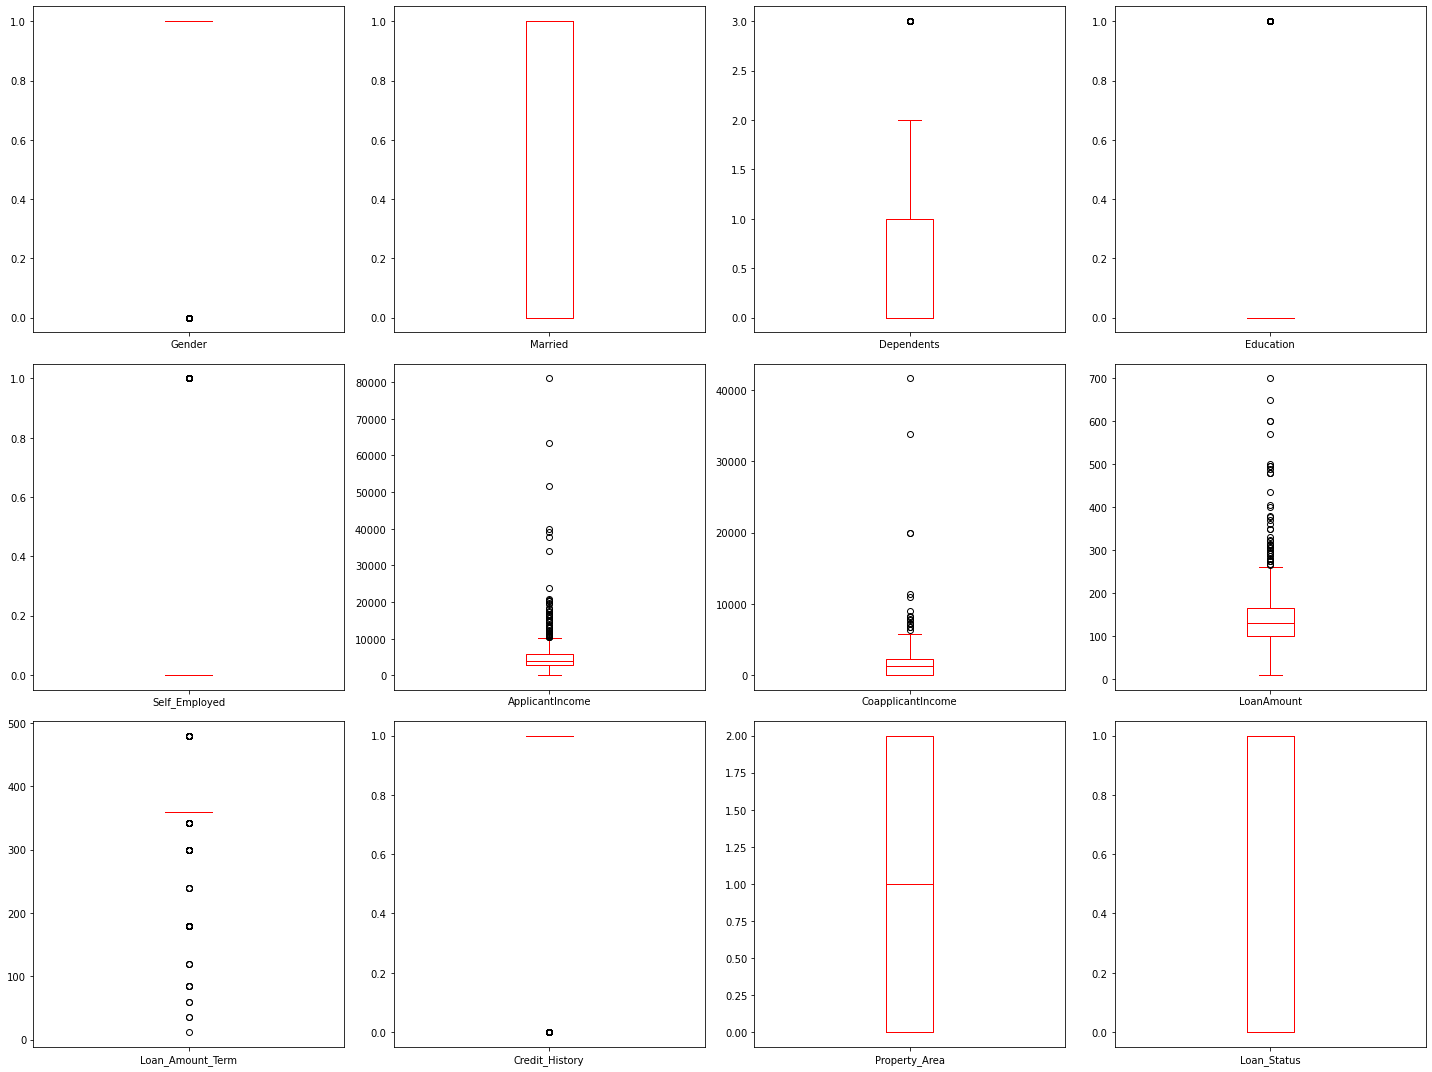

In [34]:
### Before removing skewness lets check with Outliers.
plt.figure(figsize=(20,15), facecolor='white')
count = 1
for column in data:
    if count<=12:
        ax = plt.subplot(3,4,count)
        data[column].plot(kind = 'box',color ='r')
    count +=1
plt.tight_layout()

As we can see by above box plot all the continous columns contain Outliers.
Lets deal with outlier first.

### Pre-Processing

In [35]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [36]:
from scipy.stats import zscore
z = np.abs(zscore(data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]))
filter_entry = (z<3).all(axis = 1)
df = data[filter_entry]

In [37]:
df.skew()

Gender              -1.608201
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

WE have removed some of the skewness from our dataset.
but lets check with dataloss.

In [38]:
print(data.shape,df.shape)

(614, 12) (577, 12)


In [39]:
data_loss = ((614 - 577)/614)*100
data_loss

6.026058631921824

After applying zscore our dataloss is 6% which is acceptable.
Now let's deal with Skewness.

In [40]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])
df['LoanAmount'] = np.sqrt(df['LoanAmount'])
df['Loan_Amount_Term'] = np.power(df['Loan_Amount_Term'],3)

In [41]:
df.skew()

Gender              -1.608201
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.207967
CoapplicantIncome    0.207591
LoanAmount           0.320372
Loan_Amount_Term     0.745169
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

As we can see all the skewness is removed from all the continous dtype columns.

In [42]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,0.000000,12.100089,46656000.0,1.0,2,1
1,1,1,1,0,0,8.430109,38.832976,11.313708,46656000.0,1.0,0,0
2,1,1,0,0,1,8.006368,0.000000,8.124038,46656000.0,1.0,2,1
3,1,1,0,1,0,7.856707,48.559242,10.954451,46656000.0,1.0,2,1
4,1,0,0,0,0,8.699515,0.000000,11.874342,46656000.0,1.0,2,1
5,1,1,2,0,1,8.597297,64.776539,16.340135,46656000.0,1.0,2,1
6,1,1,0,1,0,7.754910,38.935845,9.746794,46656000.0,1.0,2,1
7,1,1,3,0,0,8.018296,50.039984,12.569805,46656000.0,0.0,1,0
8,1,1,2,0,0,8.295549,39.064050,12.961481,46656000.0,1.0,2,1
10,1,1,2,0,0,8.070906,26.457513,8.366600,46656000.0,1.0,2,1


### Class Imbalancing 

In [43]:
x = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

In [44]:
# Now let's deal with Class imbalance problem.
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_new,y_new = sm.fit_resample(x,y)

In [45]:
y_new.value_counts()

0    398
1    398
Name: Loan_Status, dtype: int64

### Scaling (Standardization)

In [46]:
#### Now lets scale our data.
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled = scale.fit_transform(x_new)


### Train - Test Split

In [47]:
 # Now converting data into Train test split.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_new,test_size=0.25,random_state=52)

In [48]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(597, 11) (597,) (199, 11) (199,)


### Finding best model

In [49]:
## Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

In [50]:
#### Logistic Regression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_lr_pred = lr.predict(x_test)

In [51]:
confusion_matrix(y_test,y_lr_pred)

array([[57, 28],
       [25, 89]], dtype=int64)

In [52]:
accuracy_lr = classification_report(y_test,y_lr_pred)
print(accuracy_lr)
cv_lr = cross_val_score(lr,x_scaled,y_new,cv=5).mean()
print('Cross validation score :',cv_lr)

              precision    recall  f1-score   support

           0       0.70      0.67      0.68        85
           1       0.76      0.78      0.77       114

    accuracy                           0.73       199
   macro avg       0.73      0.73      0.73       199
weighted avg       0.73      0.73      0.73       199

Cross validation score : 0.7563757861635221


In [53]:
#### Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_dt_pred = dt.predict(x_test)

In [54]:
confusion_matrix(y_test,y_dt_pred)

array([[63, 22],
       [24, 90]], dtype=int64)

In [55]:
accuracy_dt = classification_report(y_test,y_dt_pred)
print(accuracy_dt)
cv_dt = cross_val_score(dt,x_scaled,y_new,cv=5).mean()
print('Cross validation score :',cv_dt)

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        85
           1       0.80      0.79      0.80       114

    accuracy                           0.77       199
   macro avg       0.76      0.77      0.76       199
weighted avg       0.77      0.77      0.77       199

Cross validation score : 0.7551100628930818


In [56]:
### SVC
svc = SVC()
svc.fit(x_train,y_train)
y_svc_pred = svc.predict(x_test)

In [57]:
confusion_matrix(y_test,y_svc_pred)

array([[57, 28],
       [19, 95]], dtype=int64)

In [58]:
accuracy_svc = classification_report(y_test,y_svc_pred)
print(accuracy_svc)
cv_svc = cross_val_score(svc,x_scaled,y_new,cv=5).mean()
print('Cross validation score :',cv_svc)

              precision    recall  f1-score   support

           0       0.75      0.67      0.71        85
           1       0.77      0.83      0.80       114

    accuracy                           0.76       199
   macro avg       0.76      0.75      0.75       199
weighted avg       0.76      0.76      0.76       199

Cross validation score : 0.7513443396226416


In [59]:
### Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_rf_pred = rf.predict(x_test)

In [60]:
confusion_matrix(y_test,y_rf_pred)

array([[63, 22],
       [17, 97]], dtype=int64)

In [61]:
accuracy_rf = classification_report(y_test,y_rf_pred)
print(accuracy_rf)
cv_rf = cross_val_score(rf,x_scaled,y_new,cv=5).mean()
print('Cross validation score :',cv_rf)

              precision    recall  f1-score   support

           0       0.79      0.74      0.76        85
           1       0.82      0.85      0.83       114

    accuracy                           0.80       199
   macro avg       0.80      0.80      0.80       199
weighted avg       0.80      0.80      0.80       199

Cross validation score : 0.790314465408805


In [62]:
### K-Neighbors Classifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
y_knn_pred = kn.predict(x_test)

In [63]:
confusion_matrix(y_test,y_knn_pred)

array([[57, 28],
       [29, 85]], dtype=int64)

In [64]:
accuracy_kn = classification_report(y_test,y_knn_pred)
print(accuracy_kn)
cv_kn = cross_val_score(kn,x_scaled,y_new,cv=5).mean()
print('Cross validation score :',cv_kn)

              precision    recall  f1-score   support

           0       0.66      0.67      0.67        85
           1       0.75      0.75      0.75       114

    accuracy                           0.71       199
   macro avg       0.71      0.71      0.71       199
weighted avg       0.71      0.71      0.71       199

Cross validation score : 0.7085534591194969


#### Out of 5 model Random Forest Classifier is our best model, Becuase its given as acc 83% and Cross validatiion score 88.8%. therefore its our best model.

### Let's find ROC_AUC_Scrore

In [65]:
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
#### Logistic Regression
print('roc_auc_score for Logistic Regression:',roc_auc_score(y_test,y_lr_pred))
#### Decision Tree Classifier
print('roc_auc_score for Decision Tree Classifier:',roc_auc_score(y_test,y_dt_pred))
#### SVC  
print('roc_auc_score for SVC:',roc_auc_score(y_test,y_svc_pred))
#### Random Forest Classifier 
print('roc_auc_score for Random Forest Classifier:',roc_auc_score(y_test,y_rf_pred)) 
### K-Neighbors Classifier
print('roc_auc_score for K-Neighbors Classifier:',roc_auc_score(y_test,y_knn_pred))


roc_auc_score for Logistic Regression: 0.7256449948400414
roc_auc_score for Decision Tree Classifier: 0.7653250773993809
roc_auc_score for SVC: 0.7519607843137257
roc_auc_score for Random Forest Classifier: 0.7960268317853457
roc_auc_score for K-Neighbors Classifier: 0.7081011351909186


### Let's PLOT roc_auc curve for our model

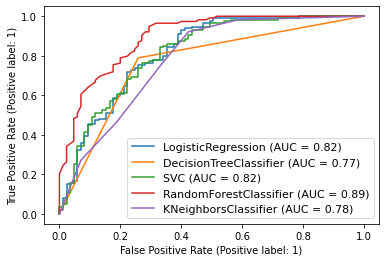

In [66]:
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_) # Here ax_ means axes with confusion matrix
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11},loc = 'lower right')
plt.show()

##### With roc_auc_curve we can see that Random forest Classifier is covering 90% of test dataset. So for this dataset Random forest Classifier is best model.
##### We can see Decision tree is also covering 91% but the accuracy for this model is less then Random forest.

### Hyper parameter tuning using GridSearchCV

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
params = {'n_estimators':np.arange(100,200,10),
          'criterion':['gini','entropy'],
          'max_depth':[11],
          'min_samples_split':np.arange(2,11,2),
          'max_features':['auto','sqrt','log2'],
         'random_state':np.arange(45,60,5)}

In [70]:
gridsearch = GridSearchCV(estimator=rf,param_grid=params,cv=5,n_jobs=-1)

In [71]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([ 2,  4,  6,  8, 10]),
                         'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190]),
                         'random_state': array([45, 50, 55])})

In [72]:
gridsearch.best_params_  ### Best parameters selected by GridsearchCV.

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 110,
 'random_state': 45}

In [78]:
rfc_final = RandomForestClassifier(criterion='gini',max_depth=11,max_features='auto',min_samples_split=2,n_estimators = 110,random_state=45)

In [79]:
rfc_final.fit(x_train,y_train)

RandomForestClassifier(max_depth=11, n_estimators=110, random_state=45)

In [80]:
y_pred = rfc_final.predict(x_test)

In [81]:
confusion_matrix(y_test,y_pred)

array([[ 60,  25],
       [ 13, 101]], dtype=int64)

In [83]:
accuracy = classification_report(y_test,y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.82      0.71      0.76        85
           1       0.80      0.89      0.84       114

    accuracy                           0.81       199
   macro avg       0.81      0.80      0.80       199
weighted avg       0.81      0.81      0.81       199



In [84]:
print('Cross_validation score for final model: ',cross_val_score(rfc_final,x_scaled,y_new,cv=5).mean())

Cross_validation score for final model:  0.7928301886792453


###### As we comparing both the model random forest with default parameters and random forest with best parameters. We can see Random forest with best parameters is giving 81% accuracy  where random forest with default parameters giving 80%.
###### Cross validation is same for both the models. Hence we will go with random forest model with best parameters.

### Saving our model

In [85]:
import pickle
Loan_prediction = 'Loan_Prediction.pickle'
pickle.dump(rfc_final,open(Loan_prediction,'wb'))

In [86]:
loaded_model = pickle.load(open(Loan_prediction,'rb'))

In [87]:
y_predict = loaded_model.predict(x_test)

In [88]:
confusion_matrix(y_test,y_predict)

array([[ 60,  25],
       [ 13, 101]], dtype=int64)

In [90]:
#____________________________________Model tested_______________________________________________________